<a href="https://colab.research.google.com/github/Yash-Wasalwar-07/TensorFlow-BootCamp/blob/main/Course-Notes/03_1_Computer_Vision_using_Tensorflow_(Multiclass_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification

We've referenced the TinyVGG architecture from the CNN Explainer website multiple times through this notebook, however, the CNN Explainer website works with 10 different image classes, where as our current model only works with two classes (pizza and steak).

1. Become one with data
2. Preprocess the data (get it ready for a model)
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#. Unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-04-09 06:26:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.128, 108.177.121.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   214MB/s    in 2.3s    

2022-04-09 06:26:42 (214 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [3]:
len(os.listdir("10_food_classes_all_data/train/pizza"))

750

In [4]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# Let's visualize our image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [7]:
random.choice(class_names)

'fried_rice'

Image shape: (288, 512, 3)


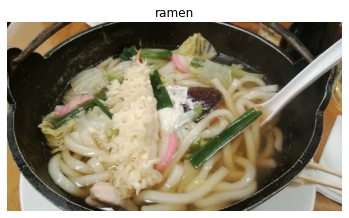

In [8]:
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [9]:
img

array([[[ 12,  12,  14],
        [ 12,  12,  14],
        [ 16,  14,  15],
        ...,
        [ 58,  55,  36],
        [120, 114,  92],
        [145, 137, 114]],

       [[ 16,  16,  16],
        [ 11,   9,  10],
        [ 22,  20,  21],
        ...,
        [ 63,  58,  39],
        [112, 104,  83],
        [128, 117,  95]],

       [[ 15,  13,  14],
        [ 13,  11,  12],
        [ 15,  14,  12],
        ...,
        [ 86,  78,  59],
        [121, 109,  87],
        [117, 102,  79]],

       ...,

       [[170, 126,  61],
        [178, 134,  69],
        [176, 132,  67],
        ...,
        [154, 117,  75],
        [159, 122,  80],
        [169, 132,  90]],

       [[172, 128,  63],
        [177, 133,  68],
        [174, 130,  67],
        ...,
        [150, 113,  69],
        [152, 115,  71],
        [155, 118,  74]],

       [[177, 133,  68],
        [181, 137,  72],
        [178, 134,  71],
        ...,
        [156, 118,  73],
        [158, 120,  75],
        [153, 115,  70]]

## 2. Preprocess the data


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             class_mode = "categorical",
                                             batch_size = 32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [12]:
# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_1 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 69s 253ms/step - loss: 2.1664 - accuracy: 0.2009 - val_loss: 2.0343 - val_accuracy: 0.2584
Epoch 2/5
235/235 [==============================] - 58s 245ms/step - loss: 1.8739 - accuracy: 0.3549 - val_loss: 1.8840 - val_accuracy: 0.3360
Epoch 3/5
235/235 [==============================] - 58s 245ms/step - loss: 1.3817 - accuracy: 0.5387 - val_loss: 2.0919 - val_accuracy: 0.3220
Epoch 4/5
235/235 [==============================] - 57s 243ms/step - loss: 0.6231 - accuracy: 0.8056 - val_loss: 2.9481 - val_accuracy: 0.2724
Epoch 5/5
235/235 [==============================] - 57s 242ms/step - loss: 0.1693 - accuracy: 0.9539 - val_loss: 4.7161 - val_accuracy: 0.2636


In [13]:
# Plot the validation and training data separately
def plot_loss_curves_2(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.figure(figsize = (22, 7))
  plt.subplot(1,2,1)
  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plot accuracy
  # plt.figure()
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend();



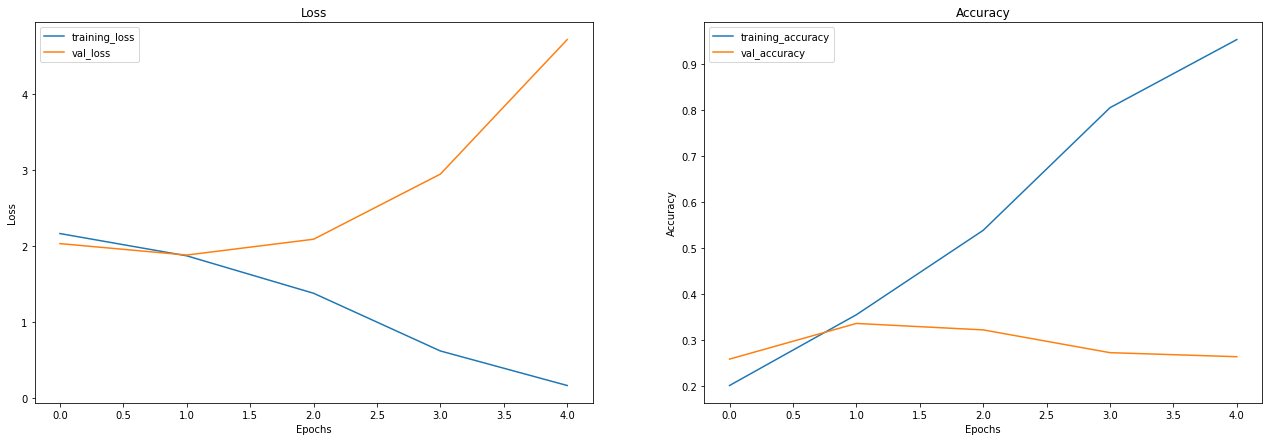

In [14]:
plot_loss_curves_2(history_1)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.

## 5. Evaluate the model

In [15]:
# Evaluate on test data
model_1.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 4.7161 - accuracy: 0.2636


[4.716113567352295, 0.2635999917984009]

## 6. Adjust the model's hyperprameters

Due to it's performance on training data., it's clear our model is learning something...

Hwever, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset


In [16]:
# How about try to simplify the model
# lets' try to remove two convolutional layers...

model_2 = Sequential([
        Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
        MaxPool2D(),
        Conv2D(10, 3, activation = "relu"),
        MaxPool2D(),
        Flatten(),
        Dense(10, activation = "softmax")

])

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 216ms/step - loss: 2.1205 - accuracy: 0.2527 - val_loss: 1.9541 - val_accuracy: 0.3024
Epoch 2/5
235/235 [==============================] - 51s 219ms/step - loss: 1.7597 - accuracy: 0.3960 - val_loss: 1.9175 - val_accuracy: 0.3292
Epoch 3/5
235/235 [==============================] - 57s 243ms/step - loss: 1.3147 - accuracy: 0.5699 - val_loss: 2.1099 - val_accuracy: 0.3148
Epoch 4/5
235/235 [==============================] - 52s 219ms/step - loss: 0.8134 - accuracy: 0.7497 - val_loss: 2.3493 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 52s 220ms/step - loss: 0.4263 - accuracy: 0.8803 - val_loss: 2.9936 - val_accuracy: 0.3016


In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

## Trying to reduce overfitting with data augmentation
Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [18]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [19]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (using the same setup as previous models)
model_3.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [20]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [21]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 145s 614ms/step - loss: 2.2273 - accuracy: 0.1876 - val_loss: 2.0315 - val_accuracy: 0.2856
Epoch 2/5
235/235 [==============================] - 139s 593ms/step - loss: 2.0677 - accuracy: 0.2696 - val_loss: 1.9092 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 127s 539ms/step - loss: 2.0268 - accuracy: 0.2815 - val_loss: 1.8429 - val_accuracy: 0.3576
Epoch 4/5
235/235 [==============================] - 124s 526ms/step - loss: 1.9961 - accuracy: 0.3047 - val_loss: 1.8700 - val_accuracy: 0.3488
Epoch 5/5
235/235 [==============================] - 125s 530ms/step - loss: 1.9543 - accuracy: 0.3140 - val_loss: 1.7765 - val_accuracy: 0.3908


## 7. Repeat until satisfied
We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:

- restructuring our model's architecture (increasing layers/hidden units)
adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

In [ ]:
class_names

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
list(class_names)

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model = model_3,
              filename="03-sushi.jpeg",
              class_names=class_names)

In [ ]:
pred_and_plot(model = model_3,
              filename = "03-hamburger.jpeg",
              class_names = class_names)

Looks like our model didn't perform very well on our custom images but this because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and Loading the model !!

In [ ]:
# Good news: our updated pred_and_plot function works for binary classification too...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])

In [ ]:
# Save a model
model_3.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_3.evaluate(test_data)

In [ ]:
# Compare our loaded model to our existing model
model_3.evaluate(test_data)